# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [101]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [102]:
url = 'http://api.openweathermap.org/data/2.5/weather?'

In [103]:
# This is for just for finding parameters for the cell below

city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"
city_weather_response = requests.get(city_url)
city_weather = city_weather_response.json()
city_weather

{'coord': {'lon': 74.371, 'lat': 56.8944},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 16.66,
  'feels_like': 16.52,
  'temp_min': 16.66,
  'temp_max': 16.66,
  'pressure': 1000,
  'humidity': 82,
  'sea_level': 1000,
  'grnd_level': 992},
 'visibility': 10000,
 'wind': {'speed': 5.03, 'deg': 0, 'gust': 8.65},
 'clouds': {'all': 100},
 'dt': 1689488232,
 'sys': {'country': 'RU', 'sunrise': 1689460309, 'sunset': 1689522288},
 'timezone': 21600,
 'id': 1490140,
 'name': 'Tara',
 'cod': 200}

In [104]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        city_weather = city_weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | daugavgriva
Processing Record 5 of Set 1 | acarau
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 9 of Set 1 | vorgashor
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | kialla
Processing Record 13 of Set 1 | mount pearl
Processing Record 14 of Set 1 | fisterra
Processing Record 15 of Set 1 | naze
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | hwange
City not found. Skipping...
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | pr

In [105]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [106]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-5.69,73,11,2.16,GS,1689488233
1,margaret river,-33.9500,115.0667,16.18,60,7,8.32,AU,1689488233
2,port-aux-francais,-49.3500,70.2167,1.60,59,90,14.48,TF,1689488233
3,daugavgriva,57.0432,24.0361,22.15,53,0,4.12,LV,1689488233
4,acarau,-2.8856,-40.1200,24.61,89,8,6.38,BR,1689488233


In [107]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [108]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-5.69,73,11,2.16,GS,1689488233
1,margaret river,-33.9500,115.0667,16.18,60,7,8.32,AU,1689488233
2,port-aux-francais,-49.3500,70.2167,1.60,59,90,14.48,TF,1689488233
3,daugavgriva,57.0432,24.0361,22.15,53,0,4.12,LV,1689488233
4,acarau,-2.8856,-40.1200,24.61,89,8,6.38,BR,1689488233


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

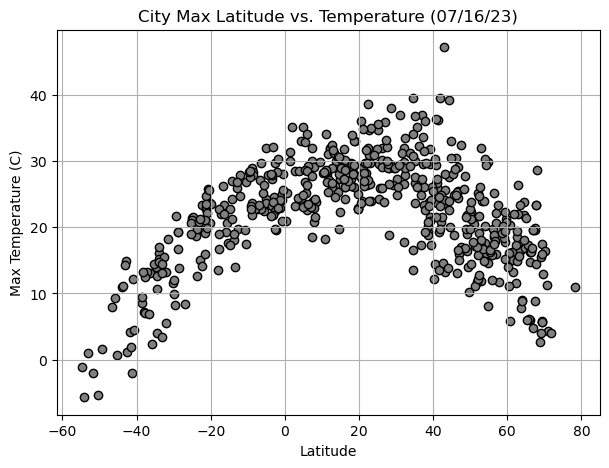

In [109]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(7,5))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="gray")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/city_latitude_vs_temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

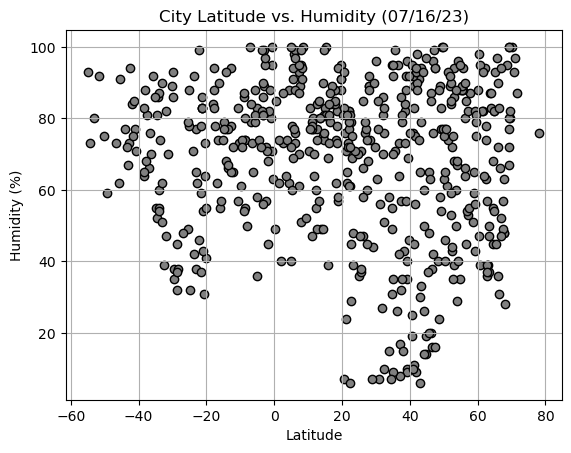

In [110]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="gray")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/city_latitude_vs_humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

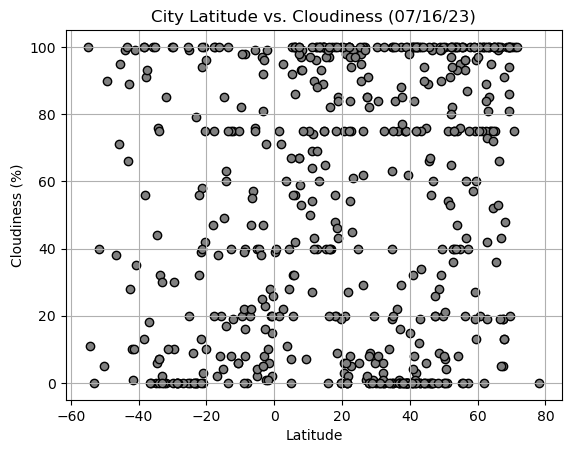

In [111]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="gray")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/city_latitude_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

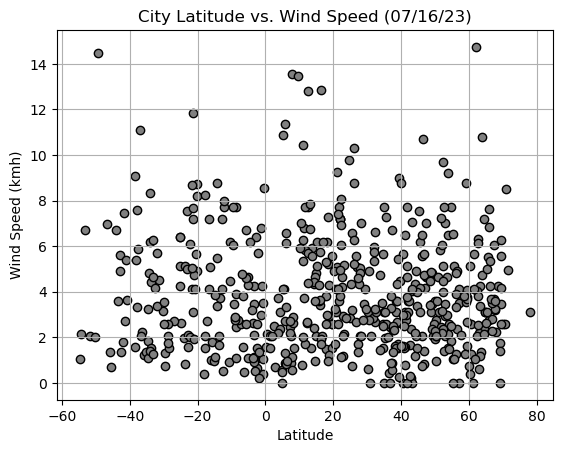

In [112]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", facecolors="gray")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmh)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/city_latitude_vs_wind_speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [113]:
# Define a function to create Linear Regression plots
# understand this function more
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    print(f"The r-value is: {round(linregress(x, y)[2],5)}")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.xlabel('Latitude')
    plt.plot(x, regress_values,"r-")


In [114]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,daugavgriva,57.0432,24.0361,22.15,53,0,4.12,LV,1689488233
5,constantia,44.1833,28.6500,27.61,50,0,1.20,RO,1689488120
7,vorgashor,67.5833,63.9500,19.62,48,19,3.69,RU,1689488253
8,isafjordur,66.0755,-23.1240,6.04,90,99,2.76,IS,1689488253
11,mount pearl,47.5166,-52.7813,16.64,94,20,4.63,CA,1689488253


In [115]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-5.69,73,11,2.16,GS,1689488233
1,margaret river,-33.9500,115.0667,16.18,60,7,8.32,AU,1689488233
2,port-aux-francais,-49.3500,70.2167,1.60,59,90,14.48,TF,1689488233
4,acarau,-2.8856,-40.1200,24.61,89,8,6.38,BR,1689488233
6,adamstown,-25.0660,-130.1015,21.35,88,99,6.42,PN,1689488234


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.62009


Text(0, 0.5, 'Max Temp')

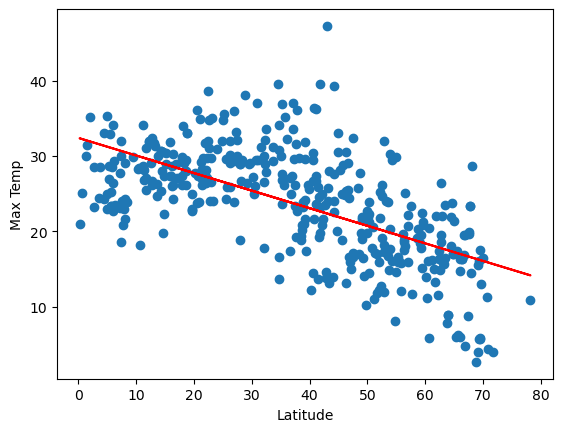

In [116]:
# Linear regression on Northern Hemisphere

linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.ylabel('Max Temp')


The r-value is: 0.85716


Text(0, 0.5, 'Max Temp')

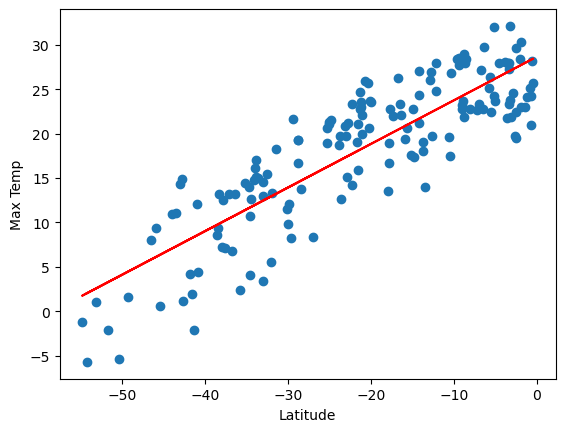

In [117]:
# Linear regression on Southern Hemisphere

linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.ylabel('Max Temp')


**Discussion about the linear relationship:** From these graphs you can see that there is a correlation between the relationship of temperature and latitude. In both the Northern and Southern hemisphere graphs you can see that as the latitude gets closer to the equator, which is 0, the max temperature raises.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0915


Text(0, 0.5, 'Humidity')

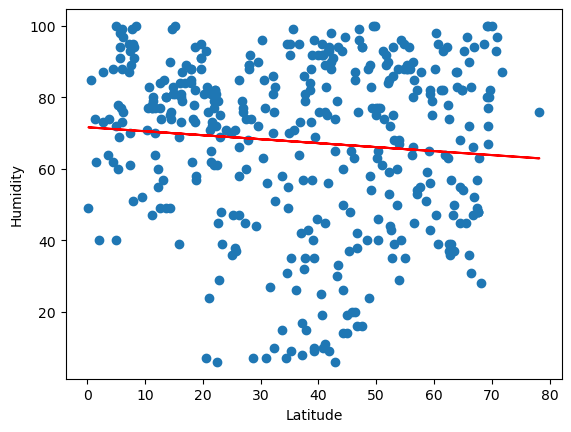

In [118]:
# Northern Hemisphere

linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.ylabel('Humidity')

The r-value is: 0.08964


Text(0, 0.5, 'Humidity')

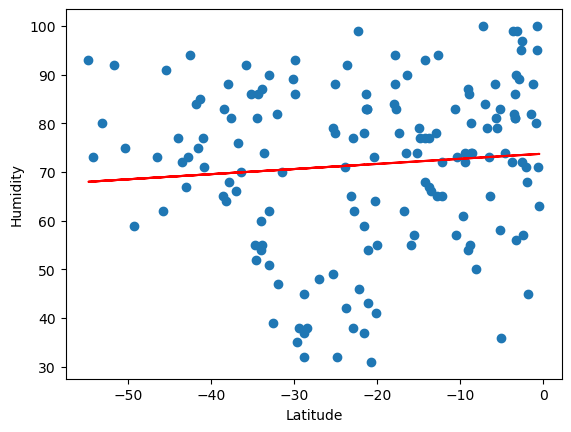

In [119]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.ylabel('Humidity')

**Discussion about the linear relationship:** The r-value in the humidity vs latitude plots are close to 0, therefore, the relationship between humidity and latitude is not closely correlated. The plots of both graphs are scattered everywhere without a tight relationship to the linear regression line.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03858


Text(0, 0.5, 'Cloudiness')

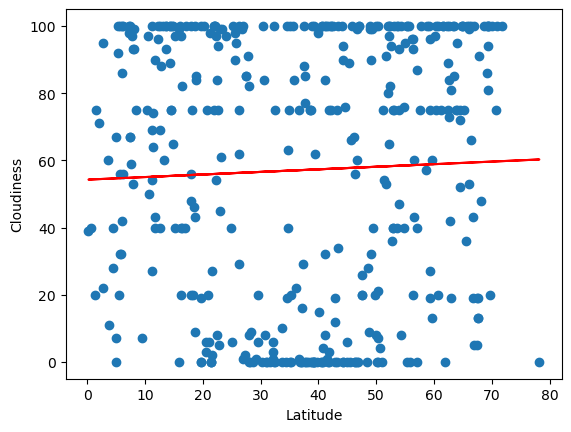

In [120]:
# Northern Hemisphere

linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness')


The r-value is: -0.06753


Text(0, 0.5, 'Cloudiness')

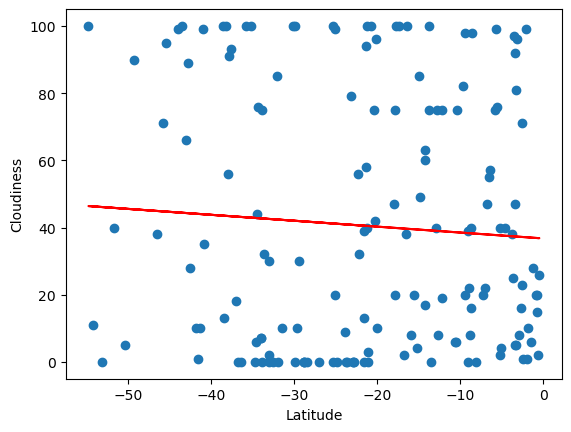

In [121]:
# Southern Hemisphere

linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** The r-value in the cloudiness vs latitude plots are close to 0, therefore, the relationship between cloudiness and latitude is not closely correlated. The plots of both graphs are scattered everywhere without a tight relationship to the linear regression line. Anywhere in the world can be cloudy or just have clear skies.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.05429


Text(0, 0.5, 'Wind Speed (kmh)')

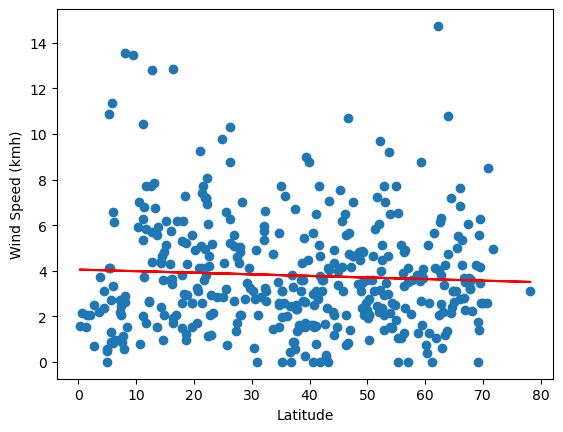

In [122]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed (kmh)')

The r-value is: -0.11496


Text(0, 0.5, 'Wind Speed (kmh)')

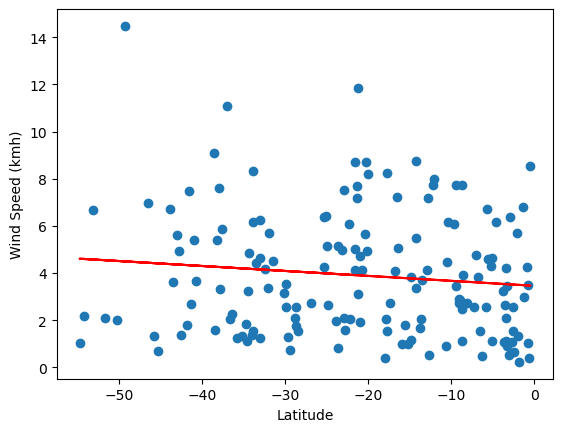

In [123]:
# Southern Hemisphere

linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed (kmh)')

**Discussion about the linear relationship:** The r-value of every relationship is all very close to 0, therefore the relationship isn't strongly correlated between wind speed and latitude with the linear regression line. However based off the graphs you can see in the southern hempishere as it gets closer to 0, generally speaking, the wind speeds reduce and get lower as well.